The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

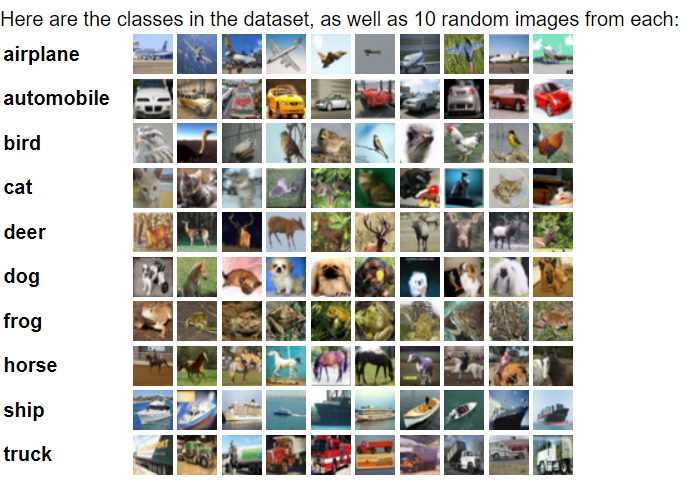

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Our first step is to load the data. The CIFAR10 dataset can be downloaded directly from TensorFlow and has already been divided. 
1. X_train is the dataset of 32x32 color images of objects that the model will be trained on.
2. y_train is the dataset of labels that correspond to x_train.
3. X_test is the dataset of 32x32 color images of objects that the model will be tested on.
4. y_test is the dataset of labels that correspond to x_test.

In [ ]:
(X_train,y_train),(X_rem,y_rem) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
from sklearn.model_selection import train_test_split
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
X_train[0].shape

In [ ]:
X_train[0]

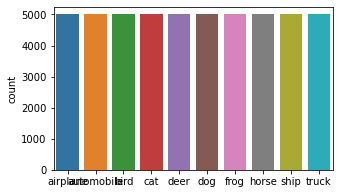

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,3))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)
plt.show()

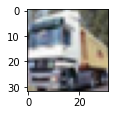

In [ ]:
plt.figure(figsize=(5,1.5))
plt.imshow(X_train[1])
plt.show()

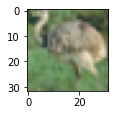

In [ ]:
plt.figure(figsize=(5,1.5))
plt.imshow(X_train[43287])
plt.show()

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

converting 2D array to a 1D array without mentioning the actual size

In [ ]:
y_train=y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_valid = y_valid.reshape(-1,)

In [ ]:
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [ ]:
def plot_sam(X,y,index):
    plt.figure(figsize=(5,1.5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

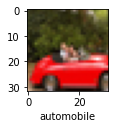

In [ ]:
plot_sam(X_train, y_train, 99)

In [ ]:
#we need to normalize the data
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	 plt.subplot(211)
	 plt.title('Cross Entropy Loss')
	 plt.plot(history.history['loss'], color='blue', label='train')
	 plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	 plt.subplot(212)
	 plt.title('Classification Accuracy')
	 plt.plot(history.history['accuracy'], color='blue', label='train')
	 plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

In [ ]:
#Build ANN

ann = models.Sequential([
      layers.Flatten(input_shape=(32,32,3)),
      layers.Dense(3000,activation='relu'),
      layers.Dense(1000,activation='relu'),
      layers.Dense(10,activation ='sigmoid')])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyann = ann.fit(X_train, y_train, epochs = 10, batch_size=64, validation_data=(X_valid, y_valid),)

Epoch 1/10
782/782 [==============================] - 140s 178ms/step - loss: 1.8604 - accuracy: 0.3395 - val_loss: 1.8297 - val_accuracy: 0.3484
Epoch 2/10
782/782 [==============================] - 114s 145ms/step - loss: 1.6836 - accuracy: 0.4076 - val_loss: 1.6405 - val_accuracy: 0.4262
Epoch 3/10
782/782 [==============================] - 127s 162ms/step - loss: 1.6047 - accuracy: 0.4364 - val_loss: 1.6649 - val_accuracy: 0.4136
Epoch 4/10
782/782 [==============================] - 94s 120ms/step - loss: 1.5493 - accuracy: 0.4574 - val_loss: 1.6535 - val_accuracy: 0.3990
Epoch 5/10
782/782 [==============================] - 97s 124ms/step - loss: 1.5076 - accuracy: 0.4719 - val_loss: 1.5224 - val_accuracy: 0.4598
Epoch 6/10
782/782 [==============================] - 113s 145ms/step - loss: 1.4685 - accuracy: 0.4871 - val_loss: 1.6129 - val_accuracy: 0.4336
Epoch 7/10
782/782 [==============================] - 96s 122ms/step - loss: 1.4394 - accuracy: 0.4960 - val_loss: 1.6664 - va

In [ ]:
ann.evaluate(X_test,y_test)

157/157 [==============================] - 4s 28ms/step - loss: 1.5180 - accuracy: 0.4548


[1.518007516860962, 0.454800009727478]

In [ ]:
y_predict = ann.predict(X_test)
y_predict_classes = [np.argmax(element) for element in y_predict]

157/157 [==============================] - 7s 43ms/step


In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_classes)

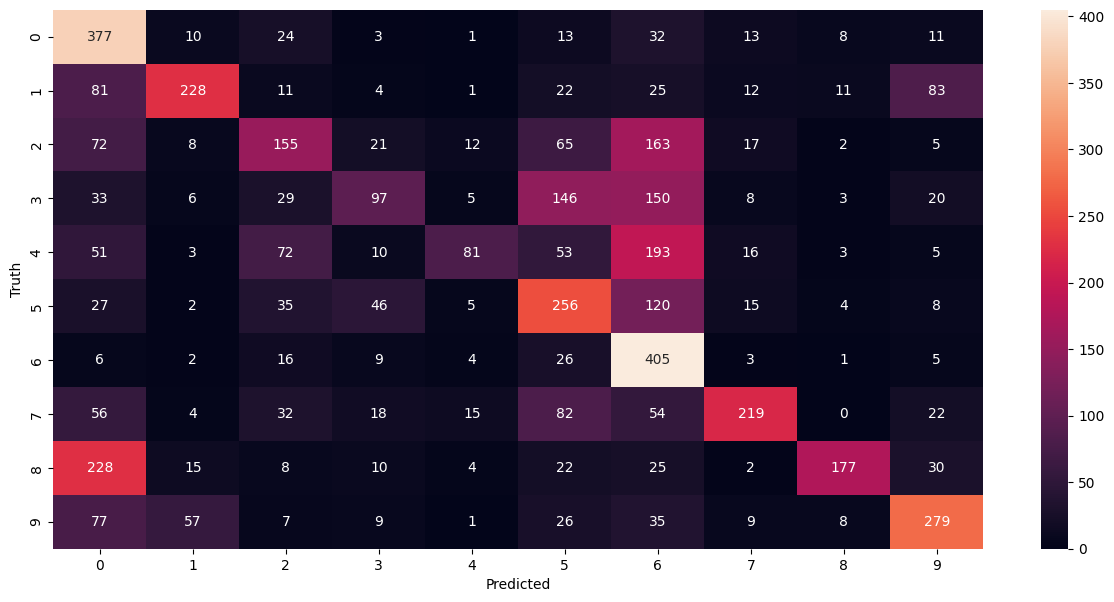

In [ ]:
import seaborn as sn
plt.figure(figsize = (15,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

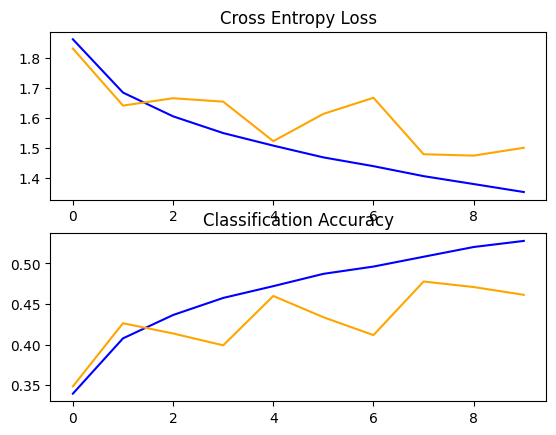

In [ ]:
summarize_diagnostics(historyann)

## We next implement the convolutional neural network

In [ ]:
from keras.optimizers import SGD
cnn = models.Sequential([
      layers.Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation = 'relu', input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(filters=64, kernel_size =(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64,activation='relu'),
      layers.Dense(10,activation='softmax')                   
])

opt = SGD(lr=0.001, momentum=0.9)
cnn.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
historycnn1 = cnn.fit(X_train,y_train,epochs=25,batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/25
782/782 [==============================] - 78s 99ms/step - loss: 2.1335 - accuracy: 0.2315 - val_loss: 1.9202 - val_accuracy: 0.3280
Epoch 2/25
782/782 [==============================] - 75s 96ms/step - loss: 1.8145 - accuracy: 0.3628 - val_loss: 1.6856 - val_accuracy: 0.4124
Epoch 3/25
782/782 [==============================] - 74s 95ms/step - loss: 1.6034 - accuracy: 0.4387 - val_loss: 1.5362 - val_accuracy: 0.4468
Epoch 4/25
782/782 [==============================] - 75s 96ms/step - loss: 1.4689 - accuracy: 0.4800 - val_loss: 1.4511 - val_accuracy: 0.4886
Epoch 5/25
782/782 [==============================] - 76s 97ms/step - loss: 1.3842 - accuracy: 0.5110 - val_loss: 1.3347 - val_accuracy: 0.5268
Epoch 6/25
782/782 [==============================] - 75s 96ms/step - loss: 1.3180 - accuracy: 0.5349 - val_loss: 1.4021 - val_accuracy: 0.5200
Epoch 7/25
782/782 [==============================] - 75s 96ms/step - loss: 1.2639 - accuracy: 0.5557 - val_loss: 1.2393 - val_accuracy:

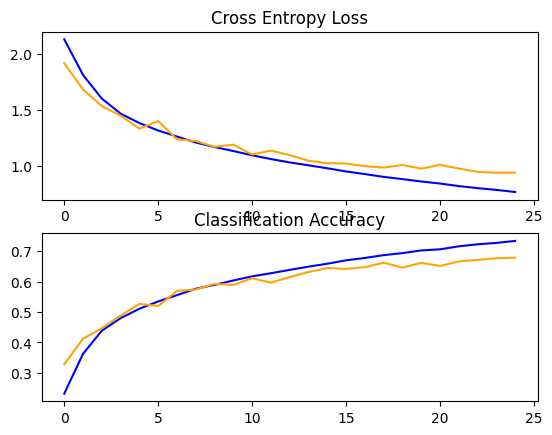

In [ ]:
summarize_diagnostics(historycnn1)

In [ ]:
# save model
cnn.save('final_model.h5')

In [ ]:
cnn.evaluate(X_test,y_test)

157/157 [==============================] - 2s 14ms/step - loss: 0.9591 - accuracy: 0.6702


[0.9590632915496826, 0.670199990272522]

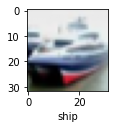

In [ ]:
plot_sam(X_test,y_test,1)

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [ ]:
y_predict = cnn.predict(X_test)
y_predict[:10]

157/157 [==============================] - 2s 14ms/step


array([[5.64486800e-05, 7.91529310e-05, 2.75783101e-03, 4.14835185e-01,
        3.65148444e-04, 3.90144080e-01, 1.22066915e-01, 9.60261503e-04,
        6.78086951e-02, 9.26269626e-04],
       [2.18339078e-02, 1.97519828e-03, 1.09827574e-02, 1.08212933e-01,
        2.82818317e-01, 5.38146794e-02, 6.98687276e-04, 5.14606953e-01,
        3.99518467e-04, 4.65705618e-03],
       [8.05502623e-06, 6.30723219e-03, 1.46326083e-05, 5.69751137e-04,
        1.40714052e-04, 2.33275823e-05, 6.14486518e-04, 2.61108817e-05,
        2.71467866e-06, 9.92293000e-01],
       [1.04724418e-03, 8.39389613e-05, 3.28557730e-01, 5.97019009e-02,
        4.52449858e-01, 1.12168200e-01, 1.76313743e-02, 2.82290559e-02,
        3.94751951e-05, 9.13013719e-05],
       [1.82158351e-02, 1.72275258e-03, 8.20850849e-01, 1.39957517e-02,
        1.14364177e-02, 1.52448965e-02, 8.87181086e-04, 9.07100588e-02,
        9.92881507e-03, 1.70074888e-02],
       [3.53633314e-02, 9.24394990e-04, 7.48402655e-01, 8.34108070e-02,
   

In [ ]:
y_classes = [np.argmax(element) for element in y_predict]

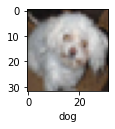

In [ ]:
plot_sam(X_test,y_test,1000)

In [ ]:
classes[y_classes[1000]]

'dog'

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_classes)

Text(114.0, 0.5, 'Truth')

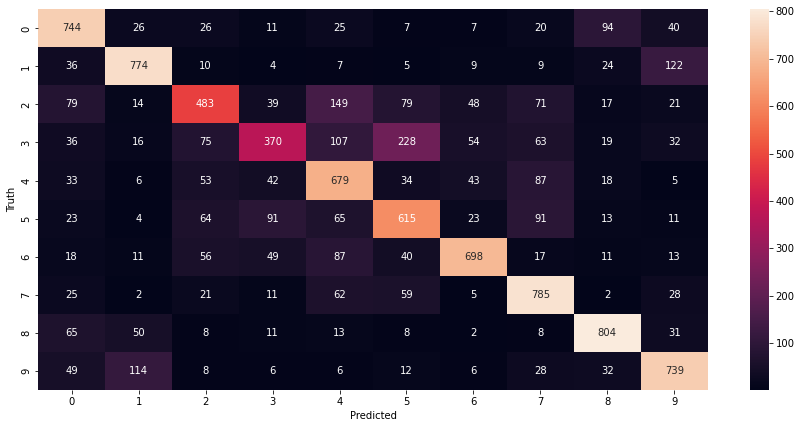

In [ ]:
import seaborn as sn
plt.figure(figsize = (15,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

The error rate of a human on CIFAR-10 is estimated to be around 6%, which means that a model achieving above 94% accuracy will be regarded as a super-human performance. According to paperswithcode.com, the best model can reach 99% accuracy on CIFAR-10

### You can try the following architecture. Make sure you do it in a system with a good CPU/GPU, otherwise there is a chance of hanging

In [ ]:
cnn2nd  = models.Sequential([
          layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
          layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
          layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
          layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
          layers.MaxPooling2D((2, 2)),
          layers.Flatten(),
          layers.Dense(128, activation='relu'),
          layers.Dense(10, activation='softmax')])
 # compile model
opt = SGD(lr=0.001, momentum=0.9)
cnn2nd.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
historycnn2 = cnn2nd.fit(X_train,y_train,epochs=25,batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/25
782/782 [==============================] - 270s 343ms/step - loss: 2.1837 - accuracy: 0.1929 - val_loss: 2.0102 - val_accuracy: 0.2790
Epoch 2/25
782/782 [==============================] - 260s 333ms/step - loss: 1.8154 - accuracy: 0.3475 - val_loss: 1.6821 - val_accuracy: 0.3932
Epoch 3/25
782/782 [==============================] - 258s 330ms/step - loss: 1.5886 - accuracy: 0.4305 - val_loss: 1.5226 - val_accuracy: 0.4646
Epoch 4/25
782/782 [==============================] - 258s 330ms/step - loss: 1.4657 - accuracy: 0.4758 - val_loss: 1.4035 - val_accuracy: 0.5028
Epoch 5/25
782/782 [==============================] - 271s 346ms/step - loss: 1.3768 - accuracy: 0.5072 - val_loss: 1.3928 - val_accuracy: 0.5104
Epoch 6/25
782/782 [==============================] - 262s 336ms/step - loss: 1.2927 - accuracy: 0.5423 - val_loss: 1.2911 - val_accuracy: 0.5418
Epoch 7/25
782/782 [==============================] - 258s 330ms/step - loss: 1.2161 - accuracy: 0.5703 - val_loss: 1.2211 -

In [ ]:
cnn2nd.evaluate(X_test,y_test)

157/157 [==============================] - 7s 43ms/step - loss: 1.0955 - accuracy: 0.6982


[1.0954722166061401, 0.698199987411499]

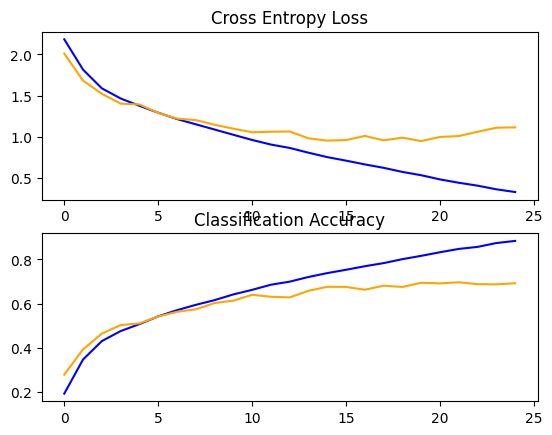

In [ ]:
summarize_diagnostics(historycnn2)

## Implementing Dropout

In [ ]:
from keras.optimizers import SGD
cnnDropOut = models.Sequential([
          layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
          layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
          layers.MaxPooling2D((2, 2)),
          layers.Dropout(0.25),
          layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
          layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
          layers.MaxPooling2D((2, 2)),
          layers.Dropout(0.25),
          layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
          layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
          layers.MaxPooling2D((2, 2)),
          layers.Flatten(),
          layers.Dense(128, activation='relu'),
          layers.Dropout(0.5),
          layers.Dense(10, activation='softmax')])
 # compile model
opt = SGD(lr=0.001, momentum=0.9)
cnnDropOut.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
historycnnDrop = cnnDropOut.fit(X_train,y_train,epochs=30,batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/30
782/782 [==============================] - 397s 506ms/step - loss: 2.2936 - accuracy: 0.1298 - val_loss: 2.2410 - val_accuracy: 0.1946
Epoch 2/30
782/782 [==============================] - 392s 501ms/step - loss: 2.0900 - accuracy: 0.2216 - val_loss: 1.9641 - val_accuracy: 0.2856
Epoch 3/30
782/782 [==============================] - 393s 503ms/step - loss: 1.9491 - accuracy: 0.2852 - val_loss: 1.7974 - val_accuracy: 0.3510
Epoch 4/30
782/782 [==============================] - 396s 507ms/step - loss: 1.7948 - accuracy: 0.3433 - val_loss: 1.6683 - val_accuracy: 0.3872
Epoch 5/30
782/782 [==============================] - 398s 508ms/step - loss: 1.6980 - accuracy: 0.3788 - val_loss: 1.5839 - val_accuracy: 0.4162
Epoch 6/30
782/782 [==============================] - 392s 501ms/step - loss: 1.6243 - accuracy: 0.4077 - val_loss: 1.4703 - val_accuracy: 0.4488
Epoch 7/30
782/782 [==============================] - 394s 504ms/step - loss: 1.5495 - accuracy: 0.4337 - val_loss: 1.4190 -

In [ ]:
cnnDropOut.evaluate(X_test,y_test)

157/157 [==============================] - 16s 101ms/step - loss: 0.7772 - accuracy: 0.7264


[0.7771685123443604, 0.7264000177383423]

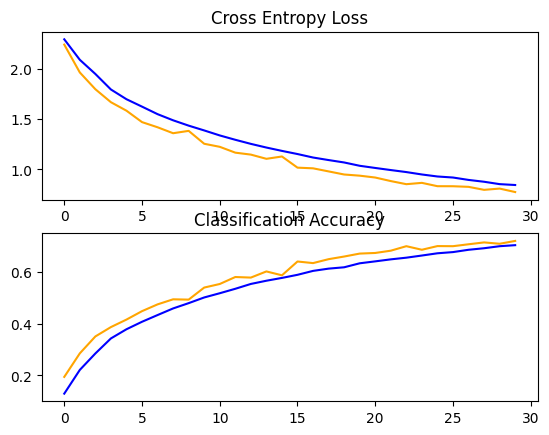

In [ ]:
summarize_diagnostics(historycnnDrop)

## Data Augmentation

We will be making copies of the examples in the training dataset with small random modifications.

Data Augmentation can be implemented in Keras using the ImageDataGenerator class

In [ ]:
from tensorflow import keras
img_height = 32
img_width = 32

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                    input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

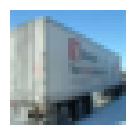

In [ ]:
#Original Image
plt.figure(figsize=(2,1.5))
plt.axis('off')
plt.imshow(X_train[15])
plt.show()

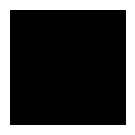

In [ ]:
#Using data augmentation
plt.figure(figsize=(2,1.5))
plt.axis('off')
#plt.imshow(data_augmentation(X_train)[15].numpy().astype("uint8"))
plt.imshow(X_train[15].astype(np.uint8))
#.astype(np.uint8)
plt.show()

In [ ]:
#Train the model using data augmentation and a drop out layer
cnnFinal = models.Sequential([
          data_augmentation,
          layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
          layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
          layers.MaxPooling2D((2, 2)),
          layers.Dropout(0.25),
          layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
          layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
          layers.MaxPooling2D((2, 2)),
          layers.Dropout(0.25),
          layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
          layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
          layers.MaxPooling2D((2, 2)),
          layers.Flatten(),
          layers.Dense(128, activation='relu'),
          layers.Dropout(0.5),
          layers.Dense(10, activation='softmax')])
 # compile model
opt = SGD(lr=0.001, momentum=0.9)
cnnFinal.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
historycnnFinal = cnnFinal.fit(X_train,y_train,epochs=40,batch_size=30, validation_data=(X_valid, y_valid))

NameError: ignored

In [ ]:
cnnFinal.evaluate(X_test,y_test)

In [ ]:
summarize_diagnostics(historycnnFinal)